In [14]:
#PROBLEM 1
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing


#load data
derm_df = pd.read_csv('dermatology.csv', delimiter = '\t')

#correct column names
derm_df = derm_df.rename(columns = {"Family History":"Family Hostory"})
derm_df = derm_df.rename(columns = {"Disappearance":"Disapperance"});

#remove rows with '?'/missing value
derm_df.drop(derm_df.index[derm_df['Age'] == '?'], inplace=True)

#convert columns to numeric
derm_df = derm_df.apply(pd.to_numeric)

#preview data
derm_df.head()

,Erythema,Scathing,Definite Borders,Itching,Koebner,Polygonal,Follicular,Oral,Knee,Scalp,...,Disapperance,Vacuolisation,Spongiosis,Retes,Follicular.1,Perifollicular,Inflamatory,Band-like,Age,Disease
0,2,2,0,3,0,0,0,0,1,0,...,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,...,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,...,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,...,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,...,2,3,2,3,0,0,2,3,45,3


In [15]:
#isolating independent feature of Age
x = derm_df['Age']

#isolating class label of Disease
y = derm_df['Disease']

In [16]:
lr_model = sm.OLS(y,x).fit()
print(lr_model.summary())

#MODEL 1: GRADIENT DESCENT
def gradient_descent(x, y):
    m1 = 0
    c1 = 0
    epochs = 5000 #define number of iterations
    n = len(x)
    L = 0.000643 #learning rate

    for i in range(epochs):
        y_Pred = m1 * x + c1
        cost = (1/n) * sum([val**2 for val in (y-y_Pred)])
        md = -(2/n)*sum(x*(y-y_Pred)) #m derivative
        cd = -(2/n)*sum(y-y_Pred) #c derivative
        m1 = m1 - L * md
        c1 = c1 - L * cd
        print ("m {}, c {}, cost {} iteration {}".format(m1, c1, cost, i))

gradient_descent(x, y)

#To minimize the cost function and find the function minimum, I used 5000 iterations with a learning rate of 0.000643.

#For derm_df, the optimal intercept is 2.3224138138359405 and the optimal gradient is 0.006776863593425256
#this yields the lowest cost function at 2.67

                                 OLS Regression Results                                
Dep. Variable:                Disease   R-squared (uncentered):                   0.564
Model:                            OLS   Adj. R-squared (uncentered):              0.563
Method:                 Least Squares   F-statistic:                              461.5
Date:                Wed, 13 Apr 2022   Prob (F-statistic):                    2.67e-66
Time:                        00:14:34   Log-Likelihood:                         -776.45
No. Observations:                 358   AIC:                                      1555.
Df Residuals:                     357   BIC:                                      1559.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

m 0.06471137984121328, c 0.3294397940623756, cost 4.326381449167797 iteration 472
m 0.04213104881898817, c 0.32957342628838865, cost 4.324279689112213 iteration 473
m 0.06460008827643053, c 0.33076086360245227, cost 4.322188291105886 iteration 474
m 0.042180159344098, c 0.33089799166391476, cost 4.320107183268965 iteration 475
m 0.0644893798013397, c 0.3320814332661737, cost 4.318036294231828 iteration 476
m 0.04222871282493044, c 0.33222203058918265, cost 4.3159755531314925 iteration 477
m 0.06437925035189922, c 0.3334015031576801, cost 4.313924889607994 iteration 478
m 0.04227671330175832, c 0.3335455433578949, cost 4.311884233800807 iteration 479
m 0.06426969589292438, c 0.33472107338170937, cost 4.309853516345313 iteration 480
m 0.04232416478610394, c 0.33486853026300417, cost 4.307832668369261 iteration 481
m 0.06416071241788224, c 0.33604014404359267, cost 4.305821621489262 iteration 482
m 0.04237107126094358, c 0.33619099159671817, cost 4.303820307807344 iteration 483
m 0.064052

m 0.04797449407699988, c 0.6432820705447788, cost 3.8237315785626267 iteration 970
m 0.04414092286974169, c 0.6437933253864633, cost 3.823129386155598 iteration 971
m 0.04793279482244036, c 0.644482861479582, cost 3.822527700898276 iteration 972
m 0.04412637907684424, c 0.6449945184906781, cost 3.8219265206496065 iteration 973
m 0.04789120313555891, c 0.6456831887067547, cost 3.821325843283187 iteration 974
m 0.04411174986109768, c 0.6461952434626786, cost 3.8207256666871388 iteration 975
m 0.047849718325000484, c 0.6468830523909938, cost 3.820125988764058 iteration 976
m 0.044097035902953066, c 0.6473955004992201, cost 3.8195268074308673 iteration 977
m 0.047808339704295905, c 0.6480824526970403, cost 3.818928120618731 iteration 978
m 0.04408223787799619, c 0.648595289796874, cost 3.818329926272954 iteration 979
m 0.047767066591827174, c 0.6492813897896788, cost 3.817732222352876 iteration 980
m 0.044067356456982266, c 0.6497946115520283, cost 3.817135006831784 iteration 981
m 0.04772

m 0.0401630459666234, c 0.9108779779312933, cost 3.578803205687286 iteration 1436
m 0.039425515668916944, c 0.9114097176103124, cost 3.578333128472759 iteration 1437
m 0.04013479474661298, c 0.9119751990048788, cost 3.577863243471057 iteration 1438
m 0.03940242071457702, c 0.9125068463333227, cost 3.5773935505376246 iteration 1439
m 0.04010657182653919, c 0.9130719948182451, cost 3.5769240495284538 iteration 1440
m 0.03937931744173859, c 0.9136035490220489, cost 3.5764547403000813 iteration 1441
m 0.040078377072167146, c 0.9141683655334881, cost 3.575985622709601 iteration 1442
m 0.03935620597644588, c 0.9146998258446439, cost 3.5755166966146352 iteration 1443
m 0.04005021035019018, c 0.9152643113126611, cost 3.575047961873359 iteration 1444
m 0.03933308644382125, c 0.915795676969175, cost 3.5745794183444732 iteration 1445
m 0.04002207152822324, c 0.9163598323177747, cost 3.574111065887212 iteration 1446
m 0.03930995896807169, c 0.9168911025636238, cost 3.573642904361344 iteration 1447

m 0.03395375450062452, c 1.157870452335117, cost 3.3768433010968972 iteration 1907
m 0.034077107512484085, c 1.1583743893675713, cost 3.3764529111875006 iteration 1908
m 0.03393080624190683, c 1.1588719206167213, cost 3.3760626730715613 iteration 1909
m 0.03405320369979576, c 1.1593756409115812, cost 3.375672586687753 iteration 1910
m 0.033907863654125375, c 1.1598730003040352, cost 3.3752826519748096 iteration 1911
m 0.03402931238088167, c 1.160376504096332, cost 3.3748928688714797 iteration 1912
m 0.03388492675805262, c 1.1608736915483513, cost 3.3745032373165755 iteration 1913
m 0.03400543352800416, c 1.1613769790719524, cost 3.3741137572489364 iteration 1914
m 0.03386199557428967, c 1.1618739945008991, cost 3.373724428607451 iteration 1915
m 0.03398156711359905, c 1.1623770659885153, cost 3.37333525133104 iteration 1916
m 0.033839070123267534, c 1.162873909312846, cost 3.3729462253586697 iteration 1917
m 0.0339577131102744, c 1.1633767649960403, cost 3.3725573506293456 iteration 19

m 0.028760017906859184, c 1.3833044126344036, cost 3.2087758896954095 iteration 2378
m 0.028724151135183368, c 1.3837608684472733, cost 3.2084507478302693 iteration 2379
m 0.028738545154780772, c 1.384218411403054, cost 3.208125732115495 iteration 2380
m 0.028702861475009812, c 1.3846746940922376, cost 3.2078008425020585 iteration 2381
m 0.028717081335384413, c 1.3851320556008304, cost 3.207476078940955 iteration 2382
m 0.028681579473936597, c 1.3855881652053574, cost 3.2071514413832065 iteration 2383
m 0.028695626440923064, c 1.3860453453651882, cost 3.2068269297798353 iteration 2384
m 0.028660305133258762, c 1.3865012819242728, cost 3.206502544081909 iteration 2385
m 0.028674180463683103, c 1.38695828083353, cost 3.2061782842404902 iteration 2386
m 0.02863903845424053, c 1.3874140443865697, cost 3.2058541502066777 iteration 2387
m 0.028652743395984136, c 1.3878708621432057, cost 3.205530141931586 iteration 2388
m 0.02861777943811549, c 1.3883264527297798, cost 3.2052062593663377 iter

m 0.023892639446305486, c 1.5907174453647346, cost 3.067703852807856 iteration 2853
m 0.0238875137006492, c 1.591134361527042, cost 3.067433441322433 iteration 2854
m 0.02387315529877533, c 1.5915509807884205, cost 3.0671631347432897 iteration 2855
m 0.023868000456949482, c 1.5919677344812644, cost 3.0668929330297323 iteration 2856
m 0.0238536785994264, c 1.5923841928402305, cost 3.0666228361410726 iteration 2857
m 0.023848494893675878, c 1.5928007841318101, cost 3.0663528440366403 iteration 2858
m 0.023834209346155873, c 1.5932170816456348, cost 3.066082956675778 iteration 2859
m 0.023828997007064867, c 1.5936335106040862, cost 3.065813174017852 iteration 2860
m 0.02381474753685618, c 1.594049647330055, cost 3.0655434960222436 iteration 2861
m 0.02380950679335995, c 1.5944659140234512, cost 3.0652739226483416 iteration 2862
m 0.02379529316941501, c 1.5948818900188635, cost 3.065004453855554 iteration 2863
m 0.02379002424881164, c 1.5952979945152148, cost 3.064735089603312 iteration 28

m 0.01924750703923672, c 1.789351583152339, cost 2.9447814508431516 iteration 3353
m 0.01923943467151527, c 1.7897298755948474, cost 2.9445587270432387 iteration 3354
m 0.01922981201319315, c 1.790108058345334, cost 2.94433608964883 iteration 3355
m 0.019221737552879013, c 1.7904862039074219, cost 2.9441135386263992 iteration 3356
m 0.01921212383331762, c 1.7908642400640515, cost 2.943891073942438 iteration 3357
m 0.01920404731835785, c 1.7912422388035696, cost 2.9436686955634563 iteration 3358
m 0.019194442497086406, c 1.7916201284223476, cost 2.9434464034559666 iteration 3359
m 0.019186363965149337, c 1.7919979803971184, cost 2.9432241975865114 iteration 3360
m 0.019176768001975777, c 1.7923757235340345, cost 2.943002077921616 iteration 3361
m 0.019168687490453078, c 1.7927534288018516, cost 2.9427800444278502 iteration 3362
m 0.019159100345462088, c 1.7931310255128796, cost 2.9425580970717804 iteration 3363
m 0.019151017891470678, c 1.7935085841315082, cost 2.942336235819992 iterati

m 0.015038553796332062, c 1.969278691336648, cost 2.84372019841615 iteration 3852
m 0.015030389519445499, c 1.9696220578644885, cost 2.8435366812359826 iteration 3853
m 0.015022488571604112, c 1.9699653639050565, cost 2.8433532352511284 iteration 3854
m 0.015014328343195469, c 1.970308597244789, cost 2.843169860433975 iteration 3855
m 0.015006429582502348, c 1.9706517700795587, cost 2.842986556756908 iteration 3856
m 0.01499827339473758, c 1.9709948702827067, cost 2.842803324192331 iteration 3857
m 0.014990376826585378, c 1.9713379099635016, cost 2.842620162712659 iteration 3858
m 0.014982224671677986, c 1.97168087708157, cost 2.8424370722903114 iteration 3859
m 0.014974330301412882, c 1.9720237836601917, cost 2.8422540528977183 iteration 3860
m 0.014966182171623607, c 1.9723666177446662, cost 2.8420711045073315 iteration 3861
m 0.014958290004545675, c 1.9727093912728957, cost 2.841888227091602 iteration 3862
m 0.014950145892182158, c 1.973052092375243, cost 2.8417054206229917 iteratio

m 0.011210215450550712, c 2.1329149842633934, cost 2.7602977948484457 iteration 4352
m 0.011202902917475244, c 2.1332266089906144, cost 2.7601466413116222 iteration 4353
m 0.011195635793282204, c 2.1335381742938675, cost 2.759995546414671 iteration 4354
m 0.011188326245188606, c 2.133849678130032, cost 2.7598445101348443 iteration 4355
m 0.011181061792705364, c 2.134161122558365, cost 2.7596935324494014 iteration 4356
m 0.011173755227382927, c 2.134472505550348, cost 2.759542613335609 iteration 4357
m 0.011166493446621913, c 2.1347838291506793, cost 2.759391752770742 iteration 4358
m 0.011159189861868294, c 2.135095091345338, cost 2.7592409507320936 iteration 4359
m 0.011151930752834473, c 2.135406294164567, cost 2.7590902071969556 iteration 4360
m 0.011144630146455604, c 2.1357174356087403, cost 2.758939522142627 iteration 4361
m 0.011137373709146548, c 2.136028517693748, cost 2.7587888955464304 iteration 4362
m 0.011130076078956599, c 2.1363395384342563, cost 2.7586383273856745 itera

m 0.0077424595935977215, c 2.2811403115924547, cost 2.691711654404556 iteration 4851
m 0.007735845532914834, c 2.2814231821945747, cost 2.691587108796657 iteration 4852
m 0.007729225335653954, c 2.2817059977480962, cost 2.6914626115061107 iteration 4853
m 0.007722613815911717, c 2.281988758610247, cost 2.691338162514171 iteration 4854
m 0.007715996211839207, c 2.282271464446322, cost 2.6912137618021057 iteration 4855
m 0.007709387232229428, c 2.282554115611081, cost 2.6910894093511746 iteration 4856
m 0.007702772220162362, c 2.2828367117722697, cost 2.690965105142661 iteration 4857
m 0.007696165779875876, c 2.283119253282198, cost 2.6908408491578504 iteration 4858
m 0.00768955335863302, c 2.283401739811045, cost 2.690716641378031 iteration 4859
m 0.007682949456859736, c 2.2836841717086873, cost 2.6905924817845013 iteration 4860
m 0.0076763396252615655, c 2.2839665486477196, cost 2.690468370358575 iteration 4861
m 0.00766973826119048, c 2.284248870975604, cost 2.6903443070815585 iterati

In [17]:
#MODEL 2: RANDOM FOREST

#isolating independent features(clinical and histopathological attributes)
X = derm_df.iloc[0:, 0:33]

#isolating class label
y = derm_df.iloc[0:, 34]

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X, y.values.ravel())

predictions = rfc.predict(X)
print("RF ACCURACY:", accuracy_score(y, predictions))
print(confusion_matrix(y, predictions))

#specified number of trees (n_estimators) as 100.

RF ACCURACY: 1.0
[[111   0   0   0   0   0]
 [  0  60   0   0   0   0]
 [  0   0  71   0   0   0]
 [  0   0   0  48   0   0]
 [  0   0   0   0  48   0]
 [  0   0   0   0   0  20]]


In [18]:
#MODEL 3: KNN

#isolating independent features(clinical and histopathological attributes)
X = derm_df.iloc[0:, 0:33]
#isolating class label
y = derm_df.iloc[0:, 34]

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#create KNN Classifier model
knn = KNeighborsClassifier(n_neighbors = 9)

#fit  data
knn.fit(X, np.ravel(y))

#predicting on data
predictions = knn.predict(X)

#printing Confusion matrix and accuracy scores
print('KNN confusion matrix on test data')
print(confusion_matrix(y, predictions))

print('Accuracy on test data')
print(accuracy_score(y, predictions))

#To decide k value, I used general rule of thumb of k = sqrt(N)/2. This data set is a bit larger than what we had
#used in previous assignments (N=358). Based off this, I selected 9 as the k value. 

#Accuracy score is 96.65%

KNN confusion matrix on test data
[[109   2   0   0   0   0]
 [  0  52   0   8   0   0]
 [  0   0  70   1   0   0]
 [  0   1   0  47   0   0]
 [  0   0   0   0  48   0]
 [  0   0   0   0   0  20]]
Accuracy on test data
0.9664804469273743


In [19]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

#MODEL 4: Divisive clustering, K-Means

#isolating independent features
X = derm_df.iloc[0:, 0:33]

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

#will use 6 clusters since there are 6 disease types

#K-Means
#scale data
scaler = StandardScaler()
scaler.fit_transform(X)

kmeans = KMeans(n_clusters = 6)
y_means = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
#print values for each of the 6 centroids
print(centroids)
print('KMeans', y_means)

[[ 0.00948097 -0.24760133  0.58773905  0.80536067  0.77267663  1.9032821
  -0.29602932  1.83636914 -0.6014154  -0.55160781 -0.37433593  1.8950372
   0.06394984 -0.67332089 -0.31323768  0.80959309  0.24502765 -0.30440908
  -0.09834071 -0.62465179 -0.84923137 -0.61852992 -0.44291707 -0.42693154
   1.87138022 -0.27045053  1.92887316  0.1445304   1.91733006 -0.20253427
  -0.23788494  0.57936174  1.95188873]
 [-0.04249252 -0.0817382  -0.57781658 -0.75409498 -0.70183421 -0.47084679
   3.52614595 -0.45429341  1.08919166 -0.0337252   1.14853069 -0.46880711
  -0.34305536 -0.48884471 -0.38129356  0.11824283 -0.43632126  0.38312855
  -0.04096461 -0.5302951  -0.76286068 -0.61852992 -0.36882159 -0.48218876
  -0.40856835 -0.54551102 -0.48081258  0.22198083 -0.47795742  3.61649173
   3.91887126 -0.3967873  -0.45972537]
 [ 0.60105311  0.8590667   0.65498675 -0.49343262 -0.0256052  -0.47084679
  -0.29602932 -0.45429341  0.81799793  0.66474877  0.24865496 -0.46880711
  -0.1241359   1.56275406 -0.3812935

Agglomerative clustering [2 0 1 0 1 2 4 1 5 5 0 2 2 0 1 5 2 0 1 4 3 5 4 1 4 0 3 4 5 1 0 2 0 5 1 0 2
 5 0 5 4 1 5 3 2 1 1 5 0 0 4 0 2 1 5 2 3 0 4 0 2 1 0 5 4 0 2 3 1 4 5 2 2 0
 1 4 0 2 2 2 4 0 0 1 0 5 2 2 4 0 1 5 2 4 0 3 2 4 0 2 2 0 5 0 1 0 0 1 4 1 1
 4 2 1 5 0 2 4 3 0 0 2 3 1 4 5 0 0 1 4 4 0 5 2 1 0 5 0 0 5 1 1 2 4 5 2 2 0
 0 0 4 1 2 1 2 5 5 5 1 3 2 0 0 1 5 1 1 0 0 0 1 0 0 2 1 1 0 0 0 0 3 2 2 2 2
 0 1 1 1 0 0 2 1 2 2 2 4 4 4 4 4 0 0 0 0 0 0 0 1 1 1 1 1 1 5 5 5 5 4 4 4 4
 4 4 4 2 2 2 2 0 0 0 0 0 0 3 3 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 5 2 5 5 5 5 3
 3 3 5 5 5 0 0 0 0 0 5 2 5 5 5 0 0 5 5 5 1 1 1 1 0 0 0 0 4 4 4 4 4 1 1 1 5
 0 0 5 5 5 0 0 0 1 1 1 1 1 0 0 0 0 5 2 0 0 5 1 1 5 0 0 5 5 4 4 0 0 4 4 1 0
 4 4 3 3 5 2 3 3 3 0 0 0 4 4 0 0 0 0 2 2 5 5 1 1 0]


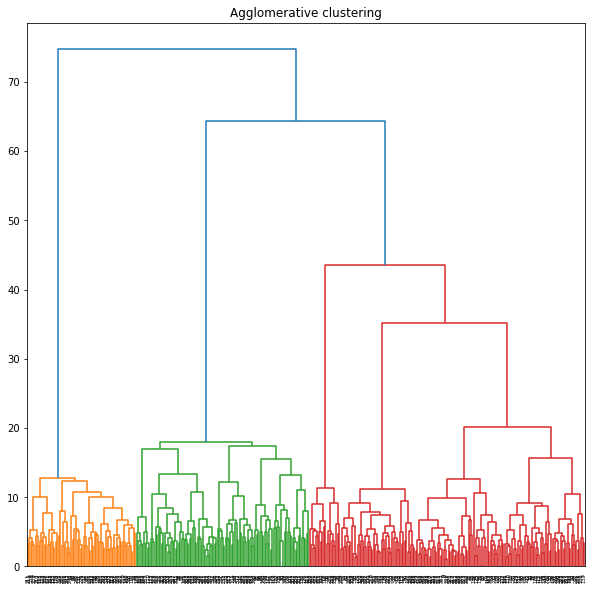

In [20]:
#Model 5: Agglomerative clustering

plt.figure(figsize = (10, 10))
plt.title('Agglomerative clustering')
#Ward
Dendrogram = sch.dendrogram((sch.linkage(X, method = 'ward')))

#will use 6 classes since there are 6 disease types

ac = AgglomerativeClustering(n_clusters = 6)
y_ac = ac.fit_predict(X)

print('Agglomerative clustering', y_ac)

In [21]:
#PROBLEM 2
#load data
hc_df = pd.read_csv('hatecrime.csv')

#preview data
hc_df.head()

,state,median_household_income,share_unemployed_seasonal,share_population_in_metro_areas,share_population_with_high_school_degree,share_non_citizen,share_white_poverty,gini_index,share_non_white,share_voters_voted_trump,hate_crimes_per_100k_splc,avg_hatecrimes_per_100k_fbi
0,Alabama,42278,0.060,0.64,0.821,0.02,0.12,0.472,0.35,0.63,0.125839,1.806410
1,Alaska,67629,0.064,0.63,0.914,0.04,0.06,0.422,0.42,0.53,0.143740,1.656700
2,Arizona,49254,0.063,0.90,0.842,0.10,0.09,0.455,0.49,0.50,0.225320,3.413928
3,Arkansas,44922,0.052,0.69,0.824,0.04,0.12,0.458,0.26,0.60,0.069061,0.869209
4,California,60487,0.059,0.97,0.806,0.13,0.09,0.471,0.61,0.33,0.255805,2.397986


In [22]:
# missing values
print(hc_df.isna().sum())
#share_non_citizen(3), hate_crimes_per_100k_fbi(5), avg_hate_crimes_per_100k_fbi(1)

state                                       0
median_household_income                     0
share_unemployed_seasonal                   0
share_population_in_metro_areas             0
share_population_with_high_school_degree    0
share_non_citizen                           3
share_white_poverty                         0
gini_index                                  0
share_non_white                             0
share_voters_voted_trump                    0
hate_crimes_per_100k_splc                   4
avg_hatecrimes_per_100k_fbi                 1
dtype: int64


In [23]:
#remove rows with missing values
hc_df = hc_df.dropna()

# normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [24]:
#1. How does income inequality relate to the number of hate crimes and hate incidents? [5 points]

#using linear regression because hate crime label is continuous value
#isolating class label
y = hc_df['hate_crimes_per_100k_splc']
#isolating independent feature of Gini index score
x = hc_df[['gini_index']]
x = sm.add_constant(x)
hc_model = sm.OLS(y, x).fit()
print(hc_model.summary())

#repeating but with avg_hatecrimes_per_100k_fbi label
y = hc_df['avg_hatecrimes_per_100k_fbi']
#isolating independent feature of Gini index score
x = hc_df[['gini_index']]
x = sm.add_constant(x)
hc_model = sm.OLS(y, x).fit()
print(hc_model.summary())

#when comparing gini_index to hate_crimes_per_100k_splc and avg_hatecrimes_per_100k_fbi labels, p-value is > 0.05
#there is a statistically significant relationship between Gini index score and crime
#based off coefficient values, Gini index score and crime rate have a positive relationship
#higher income inequality leatds to higher number of hate crimes and incidents

#linear equation using gini_index to predict hate_crimes_per_100k_splc
#hate_crimes_per_100k_splc = -1.2754  + 3.1512*x

#linear equation using gini_index to predict avg_hatecrimes_per_100k_fbi
#avg_hatecrimes_per_100k_fbi = -1.5307  + 3.7675*x


                                OLS Regression Results                               
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.145
Model:                                   OLS   Adj. R-squared:                  0.125
Method:                        Least Squares   F-statistic:                     7.280
Date:                       Wed, 13 Apr 2022   Prob (F-statistic):            0.00992
Time:                               00:14:40   Log-Likelihood:                 2.2752
No. Observations:                         45   AIC:                           -0.5504
Df Residuals:                             43   BIC:                             3.063
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [25]:
#2. How can we predict the number of hate crimes and hate incidents from race/nature of the population? 
#scale labels

#using linear regression because hate crime label is continuous value
#isolating class label
y = hc_df['hate_crimes_per_100k_splc']
#omitting Gini index score
X = hc_df[['median_household_income', 'share_unemployed_seasonal', 'share_population_in_metro_areas', 'share_population_with_high_school_degree', 'share_non_citizen', 'share_white_poverty', 'share_non_white', 'share_voters_voted_trump']]
X = sm.add_constant(X)
hc_model = sm.OLS(y, X).fit()
print(hc_model.summary())
#top 3 lowest p-values: share_voters_voted_trump, share_unemployed_seasonal, median_household_income

#see how this compares to avg_hatecrimes_per_100k_fbi
y = hc_df['avg_hatecrimes_per_100k_fbi']
#omitting Gini index score
X = hc_df[['median_household_income', 'share_unemployed_seasonal', 'share_population_in_metro_areas', 'share_population_with_high_school_degree', 'share_non_citizen', 'share_white_poverty', 'share_non_white', 'share_voters_voted_trump']]
X = sm.add_constant(X)
hc_model = sm.OLS(y, X).fit()
print(hc_model.summary())
#top 3 lowest p-values: share_voters_voted_trump, share_unemployed_seasonal, share_non_citizen


#linear equation using top 3 variables stated above (in listed order) to predict hate_crimes_per_100k_splc
#hate_crimes_per_100k_splc = -0.0038 - (1.3202*x1) + (3.5613*x2) - (4.89e-06*x3)

#linear equation using top 3 variables stated above to predict avg_hatecrimes_per_100k_fbi
#avg_hatecrimes_per_100k_fbi = 0.4265 - (-1.3202*x1) + (3.5613*x2) + (0.3391*x3)

                                OLS Regression Results                               
Dep. Variable:     hate_crimes_per_100k_splc   R-squared:                       0.534
Model:                                   OLS   Adj. R-squared:                  0.430
Method:                        Least Squares   F-statistic:                     5.150
Date:                       Wed, 13 Apr 2022   Prob (F-statistic):           0.000253
Time:                               00:14:40   Log-Likelihood:                 15.921
No. Observations:                         45   AIC:                            -13.84
Df Residuals:                             36   BIC:                             2.419
Df Model:                                  8                                         
Covariance Type:                   nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/laurensantos/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[[ 0.21256717  1.49339421]
 [ 0.39483994  3.50397559]
 [ 1.52230172 10.95347971]]
KMeans [0 0 1 0 0 1 1 0 2 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0
 1 0 0 0 0 1 0 0]


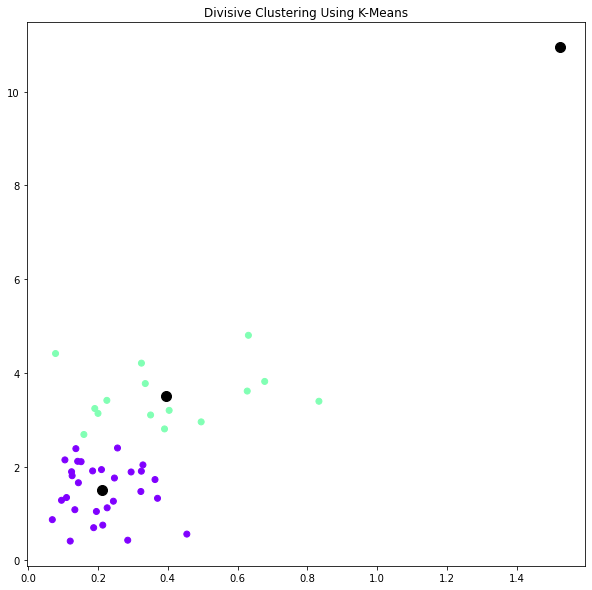

In [26]:
#3. How does the number of hate crimes vary across states? Is there any similarity in number of hate incidents (per 100,000 people) between some states than in others — both according to the SPLC after the election and the FBI before it?
#isolating class label

#add number column to refer to states
hc_df['State_Num'] = np.arange(len(hc_df))

#Clustering using K Means

#isolate and scale attributes
X = hc_df[['hate_crimes_per_100k_splc', 'avg_hatecrimes_per_100k_fbi']]
#scale data
scaler = StandardScaler()
scaler.fit_transform(X)

#K-Means
kmeans = KMeans(n_clusters = 3)
y_means = kmeans.fit_predict(X)

centroids = kmeans.cluster_centers_
#print values for each of the 3 centroids
print(centroids)
print('KMeans', y_means)

#visualization
plt.figure(figsize = (10,10))
plt.title('Divisive Clustering Using K-Means')
#visualizing 
plt.scatter(X['hate_crimes_per_100k_splc'], X['avg_hatecrimes_per_100k_fbi'], c = y_means, cmap = 'rainbow')
plt.scatter(centroids[:,0], centroids[:,1], c = 'black', s = 100)
plt.show()

#Washington DC is shown to have the highest crime rate and incident (cluster 2). 

#Colorado, Conneticut, Kansas, Maine, Maryland, Michigan, Nevada, West Virginia follow after (cluster 2)